In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
df = pd.read_csv("voice.csv")

In [11]:
df.shape

(3168, 21)

In [12]:
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [13]:
df.isnull().sum()

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

In [14]:
df.nunique()

meanfreq    3166
sd          3166
median      3077
Q25         3103
Q75         3034
IQR         3073
skew        3166
kurt        3166
sp.ent      3166
sfm         3166
mode        2825
centroid    3166
meanfun     3166
minfun       913
maxfun       123
meandom     2999
mindom        77
maxdom      1054
dfrange     1091
modindx     3079
label          2
dtype: int64

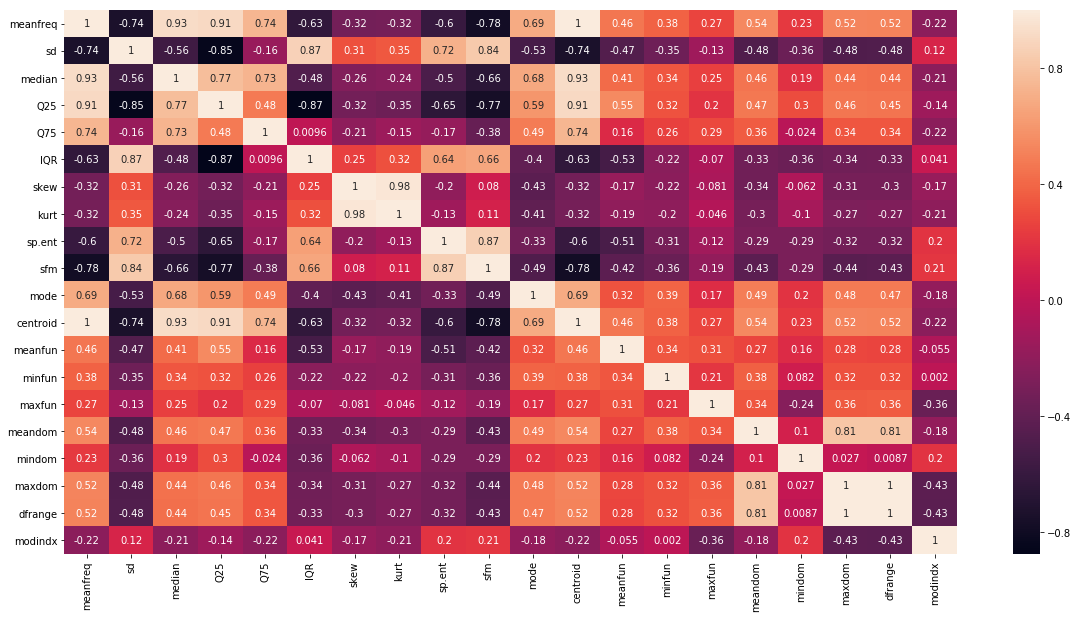

In [18]:
plt.figure(figsize=(20, 10))
corr = df.corr(method='pearson')
sns.heatmap(corr, annot=True)

In [19]:
# Stron Corelation
# 1. Centroid and Meanfreq(1)   2.  Maxdom and dfrange(1)   3.  MeanFreq and Median(0.93) 4.   MeanFreq and Q25(0.91)
# 5. Centroid and Median(0.93)  6.  Centroid and Q25(0.91)  7.  Kurt and Skew(0.98)       8.   Centroid and sfm(0.78)
# 9. sfm and sp.ent (0.87)      10. sfm and sd              11. Q25 and sfm (0.78)       12.  Q25 and IQR(0.87)
# we need to remove each one from the set of two

In [28]:
print("Total number of labels: {}".format(df.shape[0]))
print("Number of male: {}".format(df[df.label == 'male'].shape[0]))
print("Number of female: {}".format(df[df.label == 'female'].shape[0]))

Total number of labels: 3168
Number of male: 1584
Number of female: 1584


In [29]:
X=df.iloc[:, :-1]
X.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,0.000000,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.000000,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,0.000000,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,0.083878,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,0.104261,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274


In [32]:
from sklearn.preprocessing import LabelEncoder
y=df.iloc[:,-1]
gender_encoder = LabelEncoder()
y = gender_encoder.fit_transform(y)
y

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [35]:
# Scale the data to be between -1 and 1
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
X[0]

array([-4.04924806,  0.4273553 , -4.22490077, -2.57610164, -5.69360723,
       -0.21477826,  2.29330585,  1.76294635, -0.03908279,  0.4715753 ,
       -2.14121031, -4.04924806, -1.81203825, -1.0979981 ,  0.56595854,
       -1.5642046 , -0.70840431, -1.43142165, -1.41913712, -1.45477229])

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [37]:
from sklearn.svm import SVC
from sklearn import metrics
svc=SVC() #Default hyperparameters
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
0.9763406940063092


In [38]:
svc=SVC(kernel='linear')
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
0.9779179810725552


In [39]:
svc=SVC(kernel='poly')
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
0.9589905362776026


In [40]:
#from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import cross_val_score

C_range=list(range(1,26))
acc_score=[]
for c in C_range:
    svc = SVC(kernel='linear', C=c)
    scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy')
    acc_score.append(scores.mean())
print(acc_score) 

[0.9694132632752168, 0.9687843324576069, 0.9687843324576069, 0.9687843324576069, 0.9690987978664118, 0.9694132632752168, 0.9690987978664118, 0.9687843324576069, 0.9684698670488018, 0.9684698670488018, 0.9684698670488018, 0.9684698670488018, 0.9681534113525991, 0.9681534113525991, 0.9681534113525991, 0.9681534113525991, 0.9678369556563966, 0.9678369556563966, 0.9678369556563966, 0.9678369556563966, 0.9681534113525991, 0.9684678767614043, 0.9684678767614043, 0.9681514210652018, 0.9681514210652018]


Text(0,0.5,'Cross-Validated Accuracy')

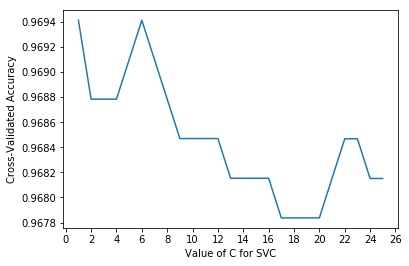

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline


C_values=list(range(1,26))
# plot the value of C for SVM (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(C_values,acc_score)
plt.xticks(np.arange(0,27,2))
plt.xlabel('Value of C for SVC')
plt.ylabel('Cross-Validated Accuracy')

In [44]:
C_range=list(np.arange(0.1,6,0.1))
acc_score=[]
for c in C_range:
    svc = SVC(kernel='linear', C=c)
    scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy')
    acc_score.append(scores.mean())
print(acc_score)    

[0.9700481649550194, 0.9691007881538095, 0.9690987978664118, 0.9690987978664118, 0.9694132632752168, 0.9694132632752168, 0.9697277286840219, 0.9694112729878194, 0.9690968075790144, 0.9694132632752168, 0.9694132632752168, 0.9694132632752168, 0.9694132632752168, 0.9687823421702095, 0.9690987978664118, 0.9690987978664118, 0.9690987978664118, 0.9690987978664118, 0.9687843324576069, 0.9687843324576069, 0.9690987978664118, 0.9690987978664118, 0.9687843324576069, 0.9687843324576069, 0.9687843324576069, 0.9687843324576069, 0.9687843324576069, 0.9687843324576069, 0.9687843324576069, 0.9687843324576069, 0.9687843324576069, 0.9687843324576069, 0.9687843324576069, 0.9687843324576069, 0.9687843324576069, 0.9687843324576069, 0.9687843324576069, 0.9687843324576069, 0.9687843324576069, 0.9687843324576069, 0.9687843324576069, 0.9687843324576069, 0.9687843324576069, 0.9687843324576069, 0.9687843324576069, 0.9687843324576069, 0.9690987978664118, 0.9690987978664118, 0.9690987978664118, 0.9690987978664118,

Text(0,0.5,'Cross-Validated Accuracy')

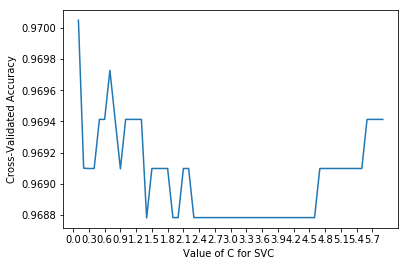

In [45]:
import matplotlib.pyplot as plt
%matplotlib inline

C_values=list(np.arange(0.1,6,0.1))
# plot the value of C for SVM (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(C_values,acc_score)
plt.xticks(np.arange(0.0,6,0.3))
plt.xlabel('Value of C for SVC ')
plt.ylabel('Cross-Validated Accuracy')

In [46]:
gamma_range=[0.0001,0.001,0.01,0.1,1,10,100]
acc_score=[]
for g in gamma_range:
    svc = SVC(kernel='rbf', gamma=g)
    scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy')
    acc_score.append(scores.mean())
print(acc_score)    

[0.8878114799777087, 0.9552463975798107, 0.9681514210652018, 0.9630960910755512, 0.9072366849773108, 0.5955377756548046, 0.5]


Text(0,0.5,'Cross-Validated Accuracy')

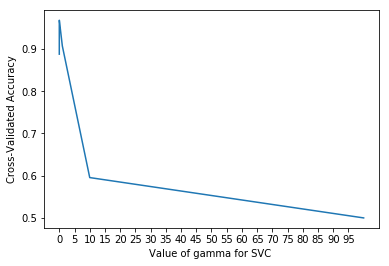

In [47]:
import matplotlib.pyplot as plt
%matplotlib inline

gamma_range=[0.0001,0.001,0.01,0.1,1,10,100]

# plot the value of C for SVM (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(gamma_range,acc_score)
plt.xlabel('Value of gamma for SVC ')
plt.xticks(np.arange(0.0001,100,5))
plt.ylabel('Cross-Validated Accuracy')

In [48]:
from sklearn.svm import SVC
svm_model= SVC()

In [49]:
tuned_parameters = {
 'C': (np.arange(0.1,1,0.1)) , 'kernel': ['linear'],
 'C': (np.arange(0.1,1,0.1)) , 'gamma': [0.01,0.02,0.03,0.04,0.05], 'kernel': ['rbf'],
 'degree': [2,3,4] ,'gamma':[0.01,0.02,0.03,0.04,0.05], 'C':(np.arange(0.1,1,0.1)) , 'kernel':['poly']
                   }

In [50]:
#from sklearn.grid_search import GridSearchCV
from sklearn.model_selection import GridSearchCV

model_svm = GridSearchCV(svm_model, tuned_parameters,cv=10,scoring='accuracy')

In [51]:
model_svm.fit(X_train, y_train)
print(model_svm.best_score_)

0.9569850039463299


In [ ]:
print(model_svm.best_params_)